In [113]:
import pandas as pd
from edgar import edgar_cleaner as ec
from edgar import edgar_downloader as ed
from edgar import ref_data
from edgar import edgar_sentiment_wordcount as esw

In [115]:
df = pd.read_csv(r'C:\Users\alexs\OneDrive - Kubrick Group\Python\Edgar Project\flapjack-edgar\edgar\df_sent.csv')

In [116]:
df['neg_ratio']=(df['Negative']/(df['Negative']+df['Positive']+df['Uncertainty']+df['Litigious']+df['Strong_Modal']+df['Weak_Modal']+df['Constraining']+df['Complexity']))
df['pos_ratio']=(df['Positive']/(df['Negative']+df['Positive']+df['Uncertainty']+df['Litigious']+df['Strong_Modal']+df['Weak_Modal']+df['Constraining']+df['Complexity']))

In [117]:
df

Unnamed: 0  index Symbol ReportType  FilingDate  Negative  Positive  \
0             0      0   AAPL        10k  2011-10-26       173        51   
1             1      0   AAPL        10k  2012-10-31       177        53   
2             2      0   AAPL        10k  2013-10-30       185        49   
3             3      0   AAPL        10k  2014-10-27       178        51   
4             4      0   AAPL        10k  2015-10-28       171        50   
..          ...    ...    ...        ...         ...       ...       ...   
699         700      0    XOM        10k  2017-02-22       141        53   
700         701      0    XOM        10k  2018-02-28       141        56   
701         702      0    XOM        10k  2019-02-27       152        56   
702         703      0    XOM        10k  2020-02-26       161        63   
703         704      0    XOM        10k  2021-02-24       172        68   

     Uncertainty  Litigious  Strong_Modal  Weak_Modal  Constraining  \
0             70         70             5          12            37   
1             68         67             5          11            36   
2             70         70             5          11            38   
3             68         69             5          11            37   
4             68         69             5          11            37   
..           ...        ...           ...         ...           ...   
699           62         61             4          12            39   
700           63         65             4          13            38   
701           62         61             3          12            39   
702           67         66             6          13            42   
703           61         63             6          12            42   

     Complexity  neg_ratio  pos_ratio  
0            79   0.348089   0.102616  
1            78   0.357576   0.107071  
2            82   0.362745   0.096078  
3            81   0.356000   0.102000  
4            83   0.346154   0.101215  
..          ...        ...        ...  
699          65   0.322654   0.121281  
700          66   0.316143   0.125561  
701          71   0.333333   0.122807  
702          75   0.326572   0.127789  
703          76   0.344000   0.136000  

[704 rows x 15 columns]

In [118]:
df1 = df[['Symbol', 'FilingDate','Negative', 'neg_ratio']]
df1['neg_ratio'] = pd.to_numeric(df1['neg_ratio'], errors = 'coerce')
df1

<ipython-input-118-d420bca56f22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['neg_ratio'] = pd.to_numeric(df1['neg_ratio'], errors = 'coerce')


Symbol  FilingDate  Negative  neg_ratio
0     AAPL  2011-10-26       173   0.348089
1     AAPL  2012-10-31       177   0.357576
2     AAPL  2013-10-30       185   0.362745
3     AAPL  2014-10-27       178   0.356000
4     AAPL  2015-10-28       171   0.346154
..     ...         ...       ...        ...
699    XOM  2017-02-22       141   0.322654
700    XOM  2018-02-28       141   0.316143
701    XOM  2019-02-27       152   0.333333
702    XOM  2020-02-26       161   0.326572
703    XOM  2021-02-24       172   0.344000

[704 rows x 4 columns]

In [119]:
df2 = df1.groupby(['Symbol']).mean()
df2

Negative  neg_ratio
Symbol                       
AAPL    176.900000   0.360421
ABBV    221.000000   0.352247
ABT     164.166667   0.341189
ACN     238.500000   0.381557
ADBE    239.777778   0.368530
...            ...        ...
VZ      127.500000   0.298177
WBA     265.142857   0.397044
WFC      27.500000   0.285156
WMT     195.400000   0.361873
XOM     150.000000   0.324977

[101 rows x 2 columns]

In [120]:
df2[df2['neg_ratio']<0.3]

Negative  neg_ratio
Symbol                       
EMR      82.769231   0.288333
GD      120.333333   0.281762
MCD     135.500000   0.296249
T       115.250000   0.287999
USB      80.428571   0.284980
VZ      127.500000   0.298177
WFC      27.500000   0.285156

In [41]:
#ref_data.get_yahoo_data('2011-10-26','2020-10-30',['EMR'])

In [121]:
df_yh = ref_data.get_yahoo_data('2011-10-26','2020-10-30',['EMR']) #EMR/MCD chosen from list above
df_yh['FilingDate'] = df_yh['date']
df_yh = df_yh[['FilingDate', 'adjclose','1_daily_return', '10_daily_return']]
df_yh

FilingDate   adjclose  1_daily_return  10_daily_return
0     2011-10-26  34.828709       -0.059633        -0.066466
1     2011-10-27  37.037342        0.010683        -0.016102
2     2011-10-28  36.645851        0.030964        -0.041666
3     2011-10-31  35.545219       -0.003933        -0.063152
4     2011-11-01  35.685581       -0.029725        -0.067322
...          ...        ...             ...              ...
2264  2020-10-26  66.190071        0.012104        -0.112203
2265  2020-10-27  65.398483        0.029697        -0.135847
2266  2020-10-28  63.512371        0.008535        -0.132310
2267  2020-10-29  62.974876       -0.005402        -0.137740
2268  2020-10-30  63.316914       -0.046645        -0.151126

[2269 rows x 4 columns]

In [122]:
dfa = df[df['Symbol']=='EMR'] #EMR/MCD
dfb= dfa[['Symbol','FilingDate', 'neg_ratio']]
dfb

Symbol  FilingDate  neg_ratio
236    EMR  2008-11-25   0.233333
237    EMR  2009-11-23   0.251337
238    EMR  2010-11-23   0.244444
239    EMR  2011-11-22   0.242424
240    EMR  2012-11-20   0.284314
241    EMR  2013-11-19   0.273585
242    EMR  2014-11-19   0.315271
243    EMR  2015-11-18   0.320755
244    EMR  2016-11-16   0.317949
245    EMR  2017-11-20   0.307692
246    EMR  2018-11-19   0.309824
247    EMR  2019-11-18   0.323741
248    EMR  2020-11-16   0.323661

In [123]:
df_yh['FilingDate'] = pd.to_datetime(df_yh['FilingDate'])
dfb['FilingDate'] = pd.to_datetime(dfb['FilingDate'])

<ipython-input-123-506280923691>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['FilingDate'] = pd.to_datetime(dfb['FilingDate'])


In [124]:
df_mg = pd.merge(dfb, df_yh)
df_mg

Symbol FilingDate  neg_ratio   adjclose  1_daily_return  10_daily_return
0    EMR 2011-11-22   0.242424  35.968288        0.026562        -0.070604
1    EMR 2012-11-20   0.284314  37.274330       -0.001236        -0.042646
2    EMR 2013-11-19   0.273585  53.205093        0.004024         0.013542
3    EMR 2014-11-19   0.315271  52.064262       -0.000934        -0.006351
4    EMR 2015-11-18   0.320755  42.055065       -0.002593         0.029436
5    EMR 2016-11-16   0.317949  47.989994        0.004936        -0.031707
6    EMR 2017-11-20   0.307692  54.310749       -0.001491        -0.068336
7    EMR 2018-11-19   0.309824  63.421642        0.020116         0.042803
8    EMR 2019-11-18   0.323741  69.762459       -0.002866         0.006335

In [125]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'EMR - Emerson Electric Co.'}, xlabel='FilingDate'>

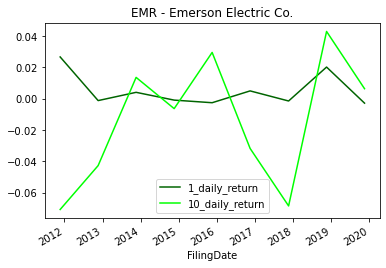

In [126]:
df_mg.plot(x = 'FilingDate', y = ['1_daily_return','10_daily_return'], color = ['darkgreen', 'lime'], kind = 'line', title = 'EMR - Emerson Electric Co.')

<AxesSubplot:title={'center':"MCD - McDonald's Corp"}, xlabel='FilingDate'>

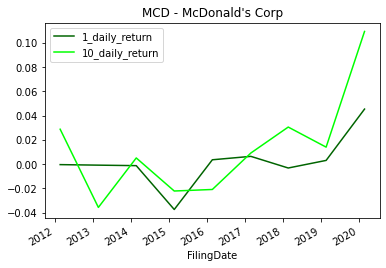

In [105]:
df_mg.plot(x = 'FilingDate', y = ['1_daily_return','10_daily_return'], color = ['darkgreen', 'lime'], kind = 'line', title = 'MCD - McDonald\'s Corp')